<font size=4 color='blue'>
    
# <center>Clase 8, julio 7 del 2021 </center>

<font size=4 color='blue'>

# <center> Topic that the Machine will learn: Handwritten Digit Recognition </center>

<font size=5 color='blue'>
From Learning Machines to Smart Machines

<font size=4 >
    
[Smart machines:](./Literatura/What-is-smart-machines.pdf)

<font size=5 color='blue'>
Classification Predictive Modeling

<font size=4 color='black'>
Classification predictive modeling is the task of approximating a mapping function F from input variables (X) to <font color='red' > $\bf discrete$ <font color='black' > target variables (Y). In statistics a variable that can take on one of a limited number of possible values is called a $\bf categorical$ $\bf variable$

<font size=5 color='blue'>
Regression Predictive Modeling

<font size=4 color='black'>
    
Regression predictive modeling is the task of approximating a mapping function F from input variables (X) to a <font color='red' > $\bf continuous$ <font color='black' > target variable (Y).

<font size=5 color='blue'>
Classification

<font size=4 color='black'>
    
A classification problem requires that samples be classified into one of two or more classes.

A classification can have real-valued or discrete input variables.

A problem with two classes is often called a two-class or binary classification.

A problem with more than two classes is often called a multi-class classification.

A problem where a sample is assigned multiple classes is called a multi-label classification.
    


<font size=5 color='blue'>
Information about the topic: Handwritten Digit Recognition using MNIST database

<font size=4 color='black'>

[Hand written Zip code recognition](./Literatura/Back-propag-hand-written-cnn-lecun-1989.pdf)

<font size=4 color='black'>
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits (samples) that is commonly used for training various image processing systems.

In [1]:
import numpy as np
import time

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Activation, Flatten
from tensorflow.keras.models import Model
import pydot
import IPython
from IPython.display import SVG
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import pickle
import gzip

np.random.seed(1)
%matplotlib inline

In [2]:
print("Numpy version", np.__version__)
print("TensorFlow version", tf.__version__)
print("Keras version", keras.__version__)
print("Pydot version", pydot.__version__)
print("Ipython version", IPython.__version__)
print("Matplotlib version", matplotlib.__version__)
print("Pickle version", pickle.format_version)
from platform import python_version
print("Python version", python_version())

Numpy version 1.20.1
TensorFlow version 2.4.1
Keras version 2.4.0
Pydot version 1.4.1
Ipython version 7.22.0
Matplotlib version 3.3.4
Pickle version 4.0
Python version 3.9.4


<font size=5 color='blue'>
Samples preparation



 <font size=4 color='black'>   
The database mnist of samples can be downloaded from the following URL: 
    
[MNIST data download](https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz)

<font size=4 color='black'>
The samples to train and test the neuronal network are in the file 'mnist.pkl.gz'.

    gzip.open(filename, mode='rb') open the compressed binary file 'filename'.
    
   The documentation of gzip.open can be found at [gzip.open(...)](https://docs.python.org/3/library/gzip.html#gzip.open)

    pickle.load(file, encoding = 'latin1') decode the file 'file' in latin1

Documentation: [pickle.load(...)](https://docs.python.org/3/library/pickle.html#pickle.load)

The function 'load_samples()' has three samples sets as output: 

    learn_samples  # Samples for training
    val_samples    # Samples for validation
    test_samples   # Samples for testing

In [3]:
# The database is in the working directory: mnist.pkl.gz file.
    
def load_samples():

    f = gzip.open('mnist.pkl.gz', 'rb')
    
    learn_samples, val_samples, test_samples = pickle.load(f, encoding="latin1")
    
    f.close()
    
    return (learn_samples, val_samples, test_samples)


In [4]:
# the samples are loaded in three sets: train_samples, val_samples and test_samples 

learn_samples, val_samples, test_samples = load_samples()
 

<font size=4 color='black'>
    
Each of these sets is a tuple with two entries:

In [5]:
print("The type of train_samples: ", type(learn_samples), "with length: ", len(learn_samples) )
print("The type of val_data: ", type(val_samples), "with length: ", len(val_samples) )
print("The type of test_data: ", type(test_samples), "with length: ", len(test_samples) )

The type of train_samples:  <class 'tuple'> with length:  2
The type of val_data:  <class 'tuple'> with length:  2
The type of test_data:  <class 'tuple'> with length:  2


In [6]:
print("Shape of the first element of the train_data tuple: ", learn_samples[0].shape)
print("Shape of the second element of the train_data tuple: ", learn_samples[1].shape)
print("Shape of the first element of the val_data tuple: ", val_samples[0].shape)
print("Shape of the second element of the val_data tuple: ", val_samples[1].shape)
print("Shape of the first element of the test_data tuple: ", test_samples[0].shape)
print("Shape of the second element of the test_data tuple: ", test_samples[1].shape)

Shape of the first element of the train_data tuple:  (50000, 784)
Shape of the second element of the train_data tuple:  (50000,)
Shape of the first element of the val_data tuple:  (10000, 784)
Shape of the second element of the val_data tuple:  (10000,)
Shape of the first element of the test_data tuple:  (10000, 784)
Shape of the second element of the test_data tuple:  (10000,)


<font size=5 color="blue">

Analyzing the samples extracted from MNIST

<font size=4 color='black'>
The first entry of a sample corresponds to the network input, the values of the pixels, which are the image features. The second entry corresponds to the target variable. It is the digit value associated to the image. $$$$It is to note that pixel values were rescaled to values between 0.0 and 1.0

In [7]:
print("features 150 to 199 of the first training sample \n \n", learn_samples[0][0][150:200])
print("\n y value of the first training sample =",learn_samples[1][0])

features 150 to 199 of the first training sample 
 
 [0.         0.         0.01171875 0.0703125  0.0703125  0.0703125
 0.4921875  0.53125    0.68359375 0.1015625  0.6484375  0.99609375
 0.96484375 0.49609375 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.1171875  0.140625   0.3671875  0.6015625
 0.6640625  0.98828125 0.98828125 0.98828125 0.98828125 0.98828125
 0.87890625 0.671875   0.98828125 0.9453125  0.76171875 0.25
 0.         0.         0.         0.         0.         0.
 0.         0.        ]

 y value of the first training sample = 5


<font size=5 color="blue">
    
Viewing one sample from the data sets

<font size=4 color='black'>
    
The digits in the MNIST dataset are images of 28x28 pixels. 
    
In the recovered datasets, images were represented by vectors of dimension 28x28=784. 
    
To deploy the digit image of a sample (index), its vector representation is changed to a matrix with dimensions 28x28.
    
    
This is done by using the following function:
    
plt.imshow(sets[0][index].reshape((28, 28)),cmap='gray')      #Images are in shades of gray

Documentation: [matplotlib.pyplot.imshow(...)](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib-pyplot-imshow)



5 is the digit corresponding to the sample 0

 This is its image


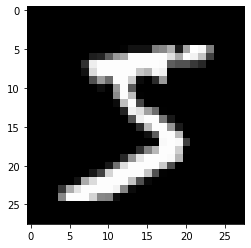

In [8]:
index = 0

plt.imshow(learn_samples[0][index].reshape((28, 28)),cmap='gray')

print(learn_samples[1][index], "is the digit corresponding to the sample", index)
print("\n This is its image")

<font size=5 color='blue'>

Separation of the samples into features (inputs) and targets:

In [9]:
x_learn = learn_samples[0]   # input (features) in the training data set
y_learn = learn_samples[1]   # target (the digit) in the training data set

x_val = val_samples[0]   # input (features) in the validation data set
y_val = val_samples[1]   # target (the digit) in the validation data set

x_test = test_samples[0]     # input (features) in the testing data set
y_test = test_samples[1]     # target (the digit) in the testing data set


In [10]:
print(type(x_learn))
print(x_learn.shape)
print(y_learn.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
(50000, 784)
(50000,)
(10000, 784)
(10000,)
(10000, 784)
(10000,)


In [11]:
y_learn

array([5, 0, 4, ..., 8, 4, 8])

<font size=5 color='blue'>
One-hot encoding of the target variable Y

<font size=4 color='black'>
The target value can have one of ten elements (classes), the digits (0, 1, 2, 3, 4, 5, 6, 7, 8, 9). 

The train_y and test_y sets are arrangements in which each entry contains a digit. Each digit is represented as a integer of 64 bits.
    
We change this representation to a vectorial one following One-hot encoding 
[One-hot encoding](https://en.wikipedia.org/wiki/One-hot).
    
In the One-Hot encoding, a digit is represented with a vector having dimension 10 (because we have 10 classes) with 1.0 in the vector index corresponding to the digit and 0.0 elsewhere in the vector. 


<font size=5 color='blue' >
    
Digit |     One-hot representation 
--- | --- 
 0  | [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 1  | [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 2  | [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 3  | [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 4  | [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 5  | [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 6  | [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 7  | [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 8  | [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 9  | [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]

<font size=5 color='purple'>
Demo using numpy.eye

In [12]:
np.eye(10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [13]:
np.eye(10)[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
np.eye(10)[1]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
y_learn[0:5]

array([5, 0, 4, 1, 9])

np.eye(10)[train_y[0:5].reshape(-1)]

In [16]:
np.eye(10)[y_learn[0:5]]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

<font size=5 color='purple'>
End of demo using numpy.eye

In [17]:
learn_y = np.eye(10)[y_learn]

val_y = np.eye(10)[y_val]

test_y = np.eye(10)[y_test]

In [18]:
print("Y: Digit representation for the first learning sample \n", y_learn[0])
print("Y: One-hot representation for the first leaning sample \n",learn_y[0])

Y: Digit representation for the first learning sample 
 5
Y: One-hot representation for the first leaning sample 
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<font size=4 color="black">
    
For convenience, the dimensions of the input sets will be changed to the format:

(number of samples, image width, image length).

In [19]:
learn_x = x_learn.reshape(50000, 28, 28)
val_x  = x_val.reshape(10000, 28, 28)
test_x = x_test.reshape(10000, 28, 28)

<font size=4 color="black">
    
In summary, the learning and test sample sets are based on the following dimensions:

In [20]:
print ("number of learning samples = " + str(learn_x.shape[0]))
print ("number of validation samples = " + str(val_x.shape[0]))
print ("number of test samples = " + str(test_x.shape[0]))
print ("learn_x shape: " + str(learn_x.shape))
print ("learn_y shape: " + str(learn_y.shape))

print ("val_x shape: " + str(val_x.shape))
print ("val_y shape: " + str(val_y.shape))

print ("test_x shape: " + str(test_x.shape))
print ("test_y shape: " + str(test_y.shape))

number of learning samples = 50000
number of validation samples = 10000
number of test samples = 10000
learn_x shape: (50000, 28, 28)
learn_y shape: (50000, 10)
val_x shape: (10000, 28, 28)
val_y shape: (10000, 10)
test_x shape: (10000, 28, 28)
test_y shape: (10000, 10)


<font size=5 color="blue">

Constructing the Learning Machine

<font size=5 color='blue'>
    
Model of the Machine: Full-Connected Feed-Forward Network (FF) with one hidden layer with twenty neurons. The nodes in the output layer will be activated with the softmax function.

<font size=5 color="black">


The architecture of the neural network will be shown

In [21]:
import networkx as nx

class Network(object):
    
    def  __init__ (self,sizes):
        self.num_layers = len(sizes)
        print("It has", self.num_layers, "layers,")
        self.sizes = sizes
        print("with the following number of nodes per layer",self.sizes)
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]
        
    def feedforward(self, x_of_sample):
        """Return the output of the network F(x_of_sample) """        
        for b, w in zip(self.biases, self.weights):
            x_of_sample = sigmoid(np.dot(w, x_of_sample)+b)
        return x_of_sample
    
    def graph(self,sizes):
        a=[]
        ps={}
        Q = nx.Graph()
        for i in range(len(sizes)):
            Qi=nx.Graph()    
            n=sizes[i]
            nodos=np.arange(n)
            Qi.add_nodes_from(nodos)
            l_i=Qi.nodes
            Q = nx.union(Q, Qi, rename = (None, 'Q%i-'%i))
            if len(l_i)==1:
                ps['Q%i-0'%i]=[i/(len(sizes)), 1/2]
            else:
                for j in range(len(l_i)+1):
                    ps['Q%i-%i'%(i,j)]=[i/(len(sizes)),(1/(len(l_i)*len(l_i)))+(j/(len(l_i)))]
            a.insert(i,Qi)
        for i in range(len(a)-1):
            for j in range(len(a[i])):
                for k in range(len(a[i+1])):
                    Q.add_edge('Q%i-%i' %(i,j),'Q%i-%i' %(i+1,k))
        nx.draw(Q, pos = ps)
                

It has 3 layers,
with the following number of nodes per layer [784, 20, 10]


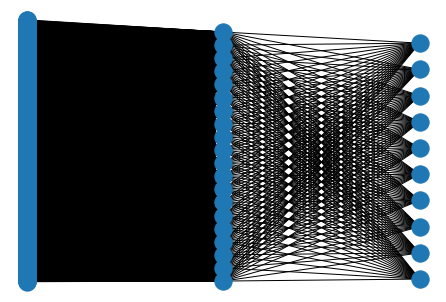

In [22]:
# Architecture of the neural network we want to implement in the present notebook

layers = [784,20,10]
net = Network(layers)
net.graph(layers)

<font size=5 color='blue'>

Definition of the neural network architecture
  

<font size=5 color='black'> 
    
Keras has two different modes to define the architecture:

<font size=4 color='black'> 
    
1.- The sequential model. It is a sequential stack of layers.
    
2.- The functional API. It is the way to go for defining complex models, such as multi-output models, directed acyclic graphs, or models with shared layers.  

In the present case, we will use this last mode for constructing the architecture of the network.
    

Documentation: [Keras Functional API](https://keras.io/getting-started/functional-api-guide/)

In [23]:
def architecture(input_shape, num_clases):
    
    # Defining the input as a tensor with shape input_shape. 
    inputs = Input(input_shape, name='input-layer')
    
    # Flattening the input tensor of dimensions (28,28,1) to a tensor of dimensions (784, 1)
    x = Flatten()(inputs)
    
    # Defining the first hidden layer with 20 nodes and sigmoid as activation function
    x = Dense(20, kernel_initializer='uniform', bias_initializer='zeros', name='hidden-layer')(x)
    x = Activation('sigmoid')(x)
    
    # Defining the output layer with num_clases nodes 
    x = Dense(num_clases, kernel_initializer='uniform', bias_initializer='zeros')(x)
    
    # For the output layer we use the activation function 'softmax'
    outputs = Activation('softmax', name='output.layer')(x)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.    
    arch_model = Model(inputs = inputs, outputs = outputs, name='MnistModel')

    return arch_model

<font size=4 color='black'> 

    
   *The softmax activation function is always used for classification when the number (K) of classes is larger than two.* 

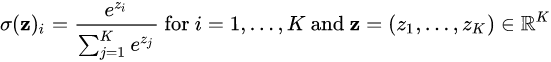
    
[Activation functions](./Literatura/activation_functions_2018.pdf)


<font size=5 color="blue">

Constructing the neural network model for the Learning Machine

In [24]:
one_image = (28,28)
num_classes= 10

# Generating a model using the architecture defined for the neural network
mnist_model = architecture(one_image, num_classes)

<font size=5 color="blue">
    
Model plot and summary

<font size=4 color='black'> 
The function 'plot_model()' generates a graphic with the layers and their number of input ands output weights.
$$ $$
Documentation: [Model visualization](https://keras.io/visualization/#training-history-visualization)

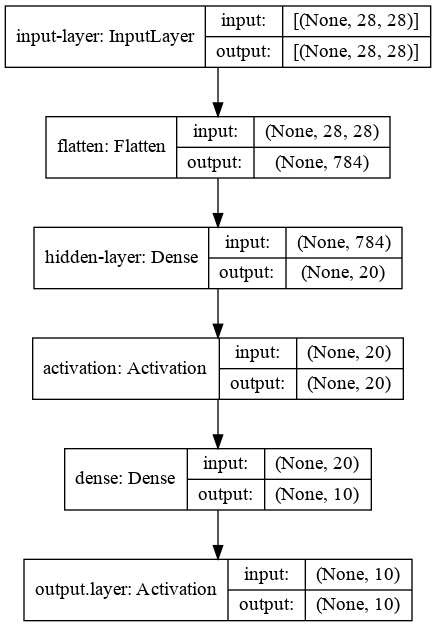

In [25]:
plot_model(mnist_model, to_file='FF_mnist_model.png', show_shapes=True, show_layer_names=True)

In [26]:

mnist_model.summary()

Model: "MnistModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input-layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
hidden-layer (Dense)         (None, 20)                15700     
_________________________________________________________________
activation (Activation)      (None, 20)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                210       
_________________________________________________________________
output.layer (Activation)    (None, 10)                0         
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
____________________________________________________

<font size=5 color='blue'>
Optimization method

<font size=4 color="black">
This requires defining the optimization algorithm, the loss function and the metric.
    
In the present case we are using the algorithm of Stochastic Gradient descent with learning rate "lr", "momentum" without Nesterov acceleration".


[An overview of gradient descent optimization algorithms](./Literatura/SGD_overview_2016-17.pdf)

This publication also comments some other optimization variants of this algorithm; Adagrad, Adadelta, RMStrop and Adam.

<font size=5 color='blue'>
Optimizer

In [27]:
learning_rate = 0.01

optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False)

<font size=5 color='blue'>
The cost (loss) and Metric functions

<font size=4 color="black">
    
The cost function *J* is the one defined as "categorical_crossentropy"
    
$$ J = \frac{1}{m} \sum_{i=1}^m \sum_{k=0}^{K-1}(y_k^{(i)}*\log{(F_k(x^{(i)})))}$$
    
 where $F_k(x^{(i)})$ is the predicted value and $y_k^{(i)}$ is the target value for the sample *i*; *K* is the number of classes and *m* is the number of samples.
    
[Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy)
    
[Categorical cross entropy](https://www.deeplearningbook.org/)
    

A metric function is similar to a loss function, except that the results from evaluating a metric are not used when training the model. You may use any of the loss functions as a metric function. In the present example, we are using "accuracy" as metrics:
    
*Accuracy = Number of correct predictions / Total number of predictions made*
    

Categorical crossentropy will compare the distribution of the predictions (the activations in the output layer, one for each class) with the true distribution, where the probability of the true class is set to 1, and 0 for the other classes.

To put it in a different way, the true class is represented as an encoded vector, and the closer the model’s outputs are to that vector, the lower the loss.
    
Documentation: [keras.compile(...)](https://keras.io/models/model/#compile)

In [28]:
loss_function = 'categorical_crossentropy'
metric_function = 'accuracy'

<font size=5 color='blue'>
Compiling the model

In [29]:
mnist_model.compile(optimizer = optimizer, loss = loss_function, metrics = [metric_function])

<font size=5 color='blue'>
    
The Machine is learning

<font size=4 color="black">
    
Documentation: [keras.fit(...)](https://keras.io/models/model/#fit)


In [30]:
start_time = time.time()

num_epochs = 100

history = mnist_model.fit(x = learn_x, y = learn_y, epochs=num_epochs, batch_size = 100, \
                          validation_data=(val_x,val_y), shuffle=False, verbose=2)

end_time = time.time()
print("Time for learning: {:10.4f}s".format(end_time - start_time))

Epoch 1/100
500/500 - 1s - loss: 2.2961 - accuracy: 0.1143 - val_loss: 2.2882 - val_accuracy: 0.1064
Epoch 2/100
500/500 - 0s - loss: 2.2755 - accuracy: 0.1171 - val_loss: 2.2576 - val_accuracy: 0.1627
Epoch 3/100
500/500 - 0s - loss: 2.2254 - accuracy: 0.2767 - val_loss: 2.1800 - val_accuracy: 0.3896
Epoch 4/100
500/500 - 0s - loss: 2.1115 - accuracy: 0.4192 - val_loss: 2.0234 - val_accuracy: 0.4732
Epoch 5/100
500/500 - 0s - loss: 1.9232 - accuracy: 0.4842 - val_loss: 1.8066 - val_accuracy: 0.5328
Epoch 6/100
500/500 - 0s - loss: 1.7067 - accuracy: 0.5442 - val_loss: 1.5915 - val_accuracy: 0.5908
Epoch 7/100
500/500 - 0s - loss: 1.5121 - accuracy: 0.6007 - val_loss: 1.4102 - val_accuracy: 0.6466
Epoch 8/100
500/500 - 0s - loss: 1.3530 - accuracy: 0.6488 - val_loss: 1.2636 - val_accuracy: 0.6951
Epoch 9/100
500/500 - 0s - loss: 1.2242 - accuracy: 0.6914 - val_loss: 1.1437 - val_accuracy: 0.7350
Epoch 10/100
500/500 - 0s - loss: 1.1176 - accuracy: 0.7267 - val_loss: 1.0432 - val_accura

Epoch 82/100
500/500 - 0s - loss: 0.2907 - accuracy: 0.9185 - val_loss: 0.2754 - val_accuracy: 0.9218
Epoch 83/100
500/500 - 0s - loss: 0.2894 - accuracy: 0.9188 - val_loss: 0.2744 - val_accuracy: 0.9218
Epoch 84/100
500/500 - 0s - loss: 0.2881 - accuracy: 0.9191 - val_loss: 0.2734 - val_accuracy: 0.9221
Epoch 85/100
500/500 - 0s - loss: 0.2868 - accuracy: 0.9194 - val_loss: 0.2723 - val_accuracy: 0.9221
Epoch 86/100
500/500 - 0s - loss: 0.2856 - accuracy: 0.9197 - val_loss: 0.2714 - val_accuracy: 0.9227
Epoch 87/100
500/500 - 0s - loss: 0.2844 - accuracy: 0.9200 - val_loss: 0.2704 - val_accuracy: 0.9229
Epoch 88/100
500/500 - 0s - loss: 0.2832 - accuracy: 0.9202 - val_loss: 0.2694 - val_accuracy: 0.9231
Epoch 89/100
500/500 - 0s - loss: 0.2821 - accuracy: 0.9205 - val_loss: 0.2685 - val_accuracy: 0.9234
Epoch 90/100
500/500 - 0s - loss: 0.2809 - accuracy: 0.9209 - val_loss: 0.2676 - val_accuracy: 0.9235
Epoch 91/100
500/500 - 0s - loss: 0.2798 - accuracy: 0.9212 - val_loss: 0.2667 - v

<font size=4 color='black'>

* Note: if you run `fit()` again, the `model` will continue learning, starting with the parameters it has already learnt, instead of reinitializing them.


<font size=5 color="blue">

Plotting the cost function of the learning and validation data sets as a function of the epoch

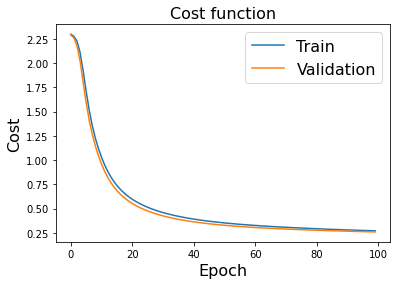

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Cost function', size=16)
plt.ylabel('Cost', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['Train', 'Validation'], loc='upper right', prop={'size': 16})
plt.show()

<font size=5 color="blue">
Plotting the accuracy function of the learning and validation sets as a function of the epoch

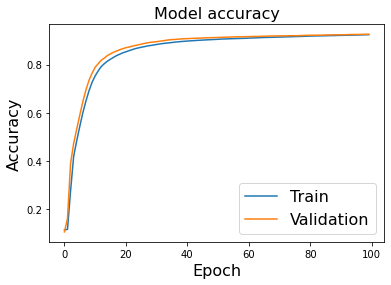

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy', size=16)
plt.ylabel('Accuracy', size=16)
plt.xlabel('Epoch', size=16)
plt.legend(['Train', 'Validation'], loc='lower right', prop={'size': 16})
plt.show()

<font size = 5 color='blue'>

Loss and accuracy evaluation using the Smart Machine and the test samples

<font size= 4 color='black'>    
After the network learnt, the loss and accuracy functions are evaluated using the test samples (test_x, test_y). This is done using the Keras Method evaluate(x=None, y=None, ...).
    

    
[Method evaluate in Keras](https://keras.io/models/model/)

In [33]:
# Evaluation using all the samples of the test set
evaluations = mnist_model.evaluate(x = test_x, y = test_y)

print ("Loss = " + str(evaluations[0]))
print ("Test Accuracy = " + str(evaluations[1]))


313/313 [==============================] - 0s 876us/step - loss: 0.2645 - accuracy: 0.9239
Loss = 0.26451700925827026
Test Accuracy = 0.9239000082015991


In [34]:
# Evaluation using the first 100 samples of the test set

evaluations = mnist_model.evaluate(x = test_x[:100], y = test_y[:100])

print ("Loss = " + str(evaluations[0]))
print ("Test Accuracy = " + str(evaluations[1]))


4/4 [==============================] - 0s 1ms/step - loss: 0.2220 - accuracy: 0.9300
Loss = 0.22200541198253632
Test Accuracy = 0.9300000071525574


<font size = 5 color='blue'>
Digits prediction with the Smart Machine

<font size= 4 color='black'>    
The smart machine generates predictions of the digists associated to new samples. For example, those in the test data (test_x, test_y). This is done using the Keras Method "predict(x, ...)"
      
[Method predict in Keras](https://keras.io/models/model/)

In [35]:
# Predicting the digits associated to each sample in the test set (test_x)
predictions = mnist_model.predict(test_x)

In [36]:
sample = 34

# Predicting the digit associated to the sample 
# np.argmax returns the index of the maximum value

prediction = np.argmax(predictions[sample])

print('For the sample number', sample, 'the prediction is the digit:', prediction)

For the sample number 34 the prediction is the digit: 7


<font size=4 color="black"> 
Displaying the digit associated (not predicted!) to this sample.

For the sample number 34 the associated digit is: 7


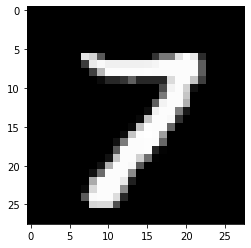

In [37]:
plt.imshow(test_samples[0][sample].reshape((28, 28)), cmap='gray')

print ('For the sample number', sample, 'the associated digit is:', np.squeeze(test_samples[1][sample]))

<font size = 5 color='blue'>
Reseting all state generated by Keras

<font size=4 >
Keras manages a global state, which it uses to implement the Functional model-building API and to uniquify autogenerated layer names.  
If you are creating many models in a loop, this global state will consume an increasing amount of memory over time, and you may want to clear it. Calling clear_session() releases the global state: this helps avoid clutter from old models and layers, especially when memory is limited.

In [38]:
tf.keras.backend.clear_session()
